<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Weather_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset for Weather Image Recognition. The dataset is located at https://www.kaggle.com/datasets/jehanbhathena/weather-dataset

In [ ]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset

 97% 571M/587M [00:09<00:00, 98.8MB/s]
100% 587M/587M [00:09<00:00, 64.6MB/s]


In [ ]:
!unzip weather-dataset -d weather-dataset

Streaming output truncated to the last 5000 lines.
  inflating: weather-dataset/dataset/frost/3913.jpg  
  inflating: weather-dataset/dataset/frost/3914.jpg  
  inflating: weather-dataset/dataset/frost/3915.jpg  
  inflating: weather-dataset/dataset/frost/3916.jpg  
  inflating: weather-dataset/dataset/frost/3917.jpg  
  inflating: weather-dataset/dataset/frost/3918.jpg  
  inflating: weather-dataset/dataset/frost/3919.jpg  
  inflating: weather-dataset/dataset/frost/3920.jpg  
  inflating: weather-dataset/dataset/frost/3921.jpg  
  inflating: weather-dataset/dataset/frost/3922.jpg  
  inflating: weather-dataset/dataset/frost/3923.jpg  
  inflating: weather-dataset/dataset/frost/3924.jpg  
  inflating: weather-dataset/dataset/frost/3925.jpg  
  inflating: weather-dataset/dataset/frost/3926.jpg  
  inflating: weather-dataset/dataset/frost/3927.jpg  
  inflating: weather-dataset/dataset/frost/3928.jpg  
  inflating: weather-dataset/dataset/frost/3929.jpg  
  inflating: weather-dataset/da

In [ ]:
import cv2
import os
import numpy as np

def load_and_preprocess(folder, label):
    images = []
    labels = []

    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)

            if img is not None:  # Check if the image was successfully loaded
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)

    return images, labels

# Definition of the paths to the Weather Image Recognition image folders
weather_folders = {
    'Dew': '/content/weather-dataset/dataset/dew',
    'Fogsmog': '/content/weather-dataset/dataset/fogsmog',
    'Frost': '/content/weather-dataset/dataset/frost',
    'Glaze': '/content/weather-dataset/dataset/glaze',
    'Hail': '/content/weather-dataset/dataset/hail',
    'Lightning': '/content/weather-dataset/dataset/lightning',
    'Rain': '/content/weather-dataset/dataset/rain',
    'Rainbow': '/content/weather-dataset/dataset/rainbow',
    'Rime': '/content/weather-dataset/dataset/rime',
    'Sandstorm': '/content/weather-dataset/dataset/sandstorm',
    'Snow': '/content/weather-dataset/dataset/snow'
}

images = []
labels = []

# Load and pre-process images for each weather condition
for label, folder in enumerate(weather_folders.values()):
    condition_images, condition_labels = load_and_preprocess(folder, label)
    images.extend(condition_images)
    labels.extend(condition_labels)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(11, activation='softmax')])  # 11 classes: Dew, Fogsmog, Frost, Glaze, Hail, Lightning, Rain, Rainbow, Rime, Sandstorm and Snow

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
172/172 [==============================] - 102s 580ms/step - loss: 27.3426 - accuracy: 0.2526 - val_loss: 2.0889 - val_accuracy: 0.2930
Epoch 2/30
172/172 [==============================] - 96s 557ms/step - loss: 1.7912 - accuracy: 0.4129 - val_loss: 2.1399 - val_accuracy: 0.3477
Epoch 3/30
172/172 [==============================] - 98s 571ms/step - loss: 1.2955 - accuracy: 0.5636 - val_loss: 2.0035 - val_accuracy: 0.3921
Epoch 4/30
172/172 [==============================] - 101s 587ms/step - loss: 1.0112 - accuracy: 0.6837 - val_loss: 2.5234 - val_accuracy: 0.4009
Epoch 5/30
172/172 [==============================] - 99s 577ms/step - loss: 0.7922 - accuracy: 0.7544 - val_loss: 2.5804 - val_accuracy: 0.4504
Epoch 6/30
172/172 [==============================] - 108s 626ms/step - loss: 0.5360 - accuracy: 0.8311 - val_loss: 3.2442 - val_accuracy: 0.4162
Epoch 7/30
172/172 [==============================] - 105s 607ms/step - loss: 0.4499 - accuracy: 0.8601 - val_loss: 3.3815 - v

In [ ]:
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/weather-dataset/dataset/rain/1011.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array and normalize pixel values if needed
new_image_array = np.array(new_image) / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['Dew', 'Fogsmog', 'Frost', 'Glaze', 'Hail', 'Lightning', 'Rain', 'Rainbow', 'Rime', 'Sandstorm', 'Snow']
predicted_class = class_labels[predicted_label]

# Display the prediction
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 108ms/step
Predicted class: Sandstorm


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

43/43 [==============================] - 6s 145ms/step


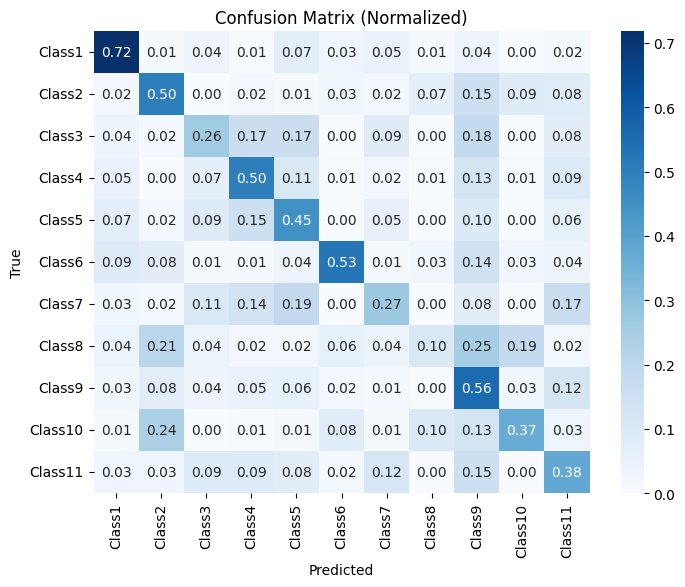

              precision    recall  f1-score   support

      Class1       0.71      0.72      0.71       156
      Class2       0.52      0.50      0.51       169
      Class3       0.32      0.26      0.29       103
      Class4       0.46      0.50      0.48       129
      Class5       0.36      0.45      0.40       111
      Class6       0.55      0.53      0.54        78
      Class7       0.35      0.27      0.31       102
      Class8       0.14      0.10      0.12        48
      Class9       0.45      0.56      0.49       212
     Class10       0.62      0.37      0.46       147
     Class11       0.31      0.38      0.34       117

    accuracy                           0.46      1372
   macro avg       0.43      0.42      0.42      1372
weighted avg       0.46      0.46      0.46      1372



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(model, x_test, y_test, class_names=None, normalize=False):
    # Get predicted probabilities from the model
    predicted_probabilities = model.predict(x_test)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predicted_probabilities, axis=1)

    # Get unique labels dynamically
    unique_labels = np.unique(np.concatenate((y_test, predicted_labels)))

    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_labels, labels=unique_labels)

    # Normalize the confusion matrix if specified
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Display the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Normalized)' if normalize else 'Confusion Matrix')
    plt.show()

    # Display classification report
    class_report = classification_report(y_test, predicted_labels, labels=unique_labels, target_names=class_names)
    print(class_report)

# Assuming 'model', 'x_test', 'y_test', and 'class_names' are properly defined
class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8', 'Class9', 'Class10', 'Class11']
plot_confusion_matrix(model, x_test, y_test, class_names=class_names, normalize=True)

